# Minkowski Distance

The Minkowski distance is a generalized metric in a normed vector space, which serves as a framework for various distance measures. It is a mathematical way to measure the distance between two points in a multi-dimensional space, and it forms the foundation for several commonly used distance metrics in data science, machine learning, and information retrieval.


## Definition and Mathematical Formulation

The Minkowski distance between two points $X = (x_1, x_2, ..., x_n)$ and $Y = (y_1, y_2, ..., y_n)$ in an n-dimensional space is defined as:

$$d(X, Y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}$$

Where:
- $X$ and $Y$ are the two points
- $n$ is the number of dimensions
- $p$ is the order parameter (a positive real number)
- $|x_i - y_i|$ is the absolute difference between the coordinates in dimension $i$

The parameter $p$ determines the specific type of Minkowski distance:
- When $p = 1$: Manhattan (or Taxicab) distance
- When $p = 2$: Euclidean distance
- When $p = \infty$: Chebyshev distance


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import minkowski

def minkowski_distance(x, y, p):
    """
    Calculate the Minkowski distance between two points.
    
    Parameters:
    -----------
    x, y : array-like
        The two points between which to calculate the distance
    p : float
        The order parameter of the Minkowski distance
        
    Returns:
    --------
    float
        The Minkowski distance
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    # Calculate the absolute differences
    diff = np.abs(x - y)
    
    # Handle the special case of p = infinity
    if np.isinf(p):
        return np.max(diff)
    
    # Calculate the Minkowski distance
    return np.power(np.sum(np.power(diff, p)), 1/p)

# Example usage
point1 = [1, 2, 3, 4]
point2 = [5, 6, 7, 8]

# Calculate distances with different p values
p_values = [1, 2, 3, np.inf]
for p in p_values:
    dist = minkowski_distance(point1, point2, p)
    print(f"Minkowski distance (p={p}): {dist:.4f}")
    
    # Verify with scipy's implementation
    scipy_dist = minkowski(point1, point2, p)
    print(f"SciPy Minkowski distance (p={p}): {scipy_dist:.4f}")
    print()


Minkowski distance (p=1): 16.0000
SciPy Minkowski distance (p=1): 16.0000

Minkowski distance (p=2): 8.0000
SciPy Minkowski distance (p=2): 8.0000

Minkowski distance (p=3): 6.3496
SciPy Minkowski distance (p=3): 6.3496

Minkowski distance (p=inf): 4.0000
SciPy Minkowski distance (p=inf): 4.0000



## Special Cases of Minkowski Distance

The Minkowski distance generalizes several important distance metrics that are widely used in various applications:

### 1. Manhattan Distance (p = 1)

Also known as Taxicab or L1 norm, the Manhattan distance is the sum of the absolute differences of their coordinates:

$$d_{Manhattan}(X, Y) = \sum_{i=1}^{n} |x_i - y_i|$$

This metric is called "Manhattan" because it measures the distance a taxi would drive in a city laid out in a grid pattern (like Manhattan).

### 2. Euclidean Distance (p = 2)

The most common distance metric, also known as the L2 norm, is the "straight-line" distance between two points:

$$d_{Euclidean}(X, Y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

This is the familiar distance formula derived from the Pythagorean theorem.

### 3. Chebyshev Distance (p = ∞)

The Chebyshev distance, or L∞ norm, is the maximum absolute difference between any coordinates of the points:

$$d_{Chebyshev}(X, Y) = \max_{i} |x_i - y_i|$$

This represents the distance in the dimension where the two points are farthest apart.


In [63]:
# Implementing the special cases explicitly
def manhattan_distance(x, y):
    """Calculate the Manhattan (L1) distance between two points."""
    return np.sum(np.abs(np.array(x) - np.array(y)))

def euclidean_distance(x, y):
    """Calculate the Euclidean (L2) distance between two points."""
    return np.sqrt(np.sum(np.square(np.array(x) - np.array(y))))

def chebyshev_distance(x, y):
    """Calculate the Chebyshev (L∞) distance between two points."""
    return np.max(np.abs(np.array(x) - np.array(y)))

# Example usage with 2D points for easier visualization
point_a = [3, 4]
point_b = [6, 8]

print(f"Points: A{point_a}, B{point_b}")
print(f"Manhattan distance: {manhattan_distance(point_a, point_b)}")
print(f"Euclidean distance: {euclidean_distance(point_a, point_b)}")
print(f"Chebyshev distance: {chebyshev_distance(point_a, point_b)}")


Points: A[3, 4], B[6, 8]
Manhattan distance: 7
Euclidean distance: 5.0
Chebyshev distance: 4


## Visualizing Minkowski Distances

To better understand how the Minkowski distance changes with different values of p, let's visualize the "unit circles" (points at a distance of 1 from the origin) for different p values:


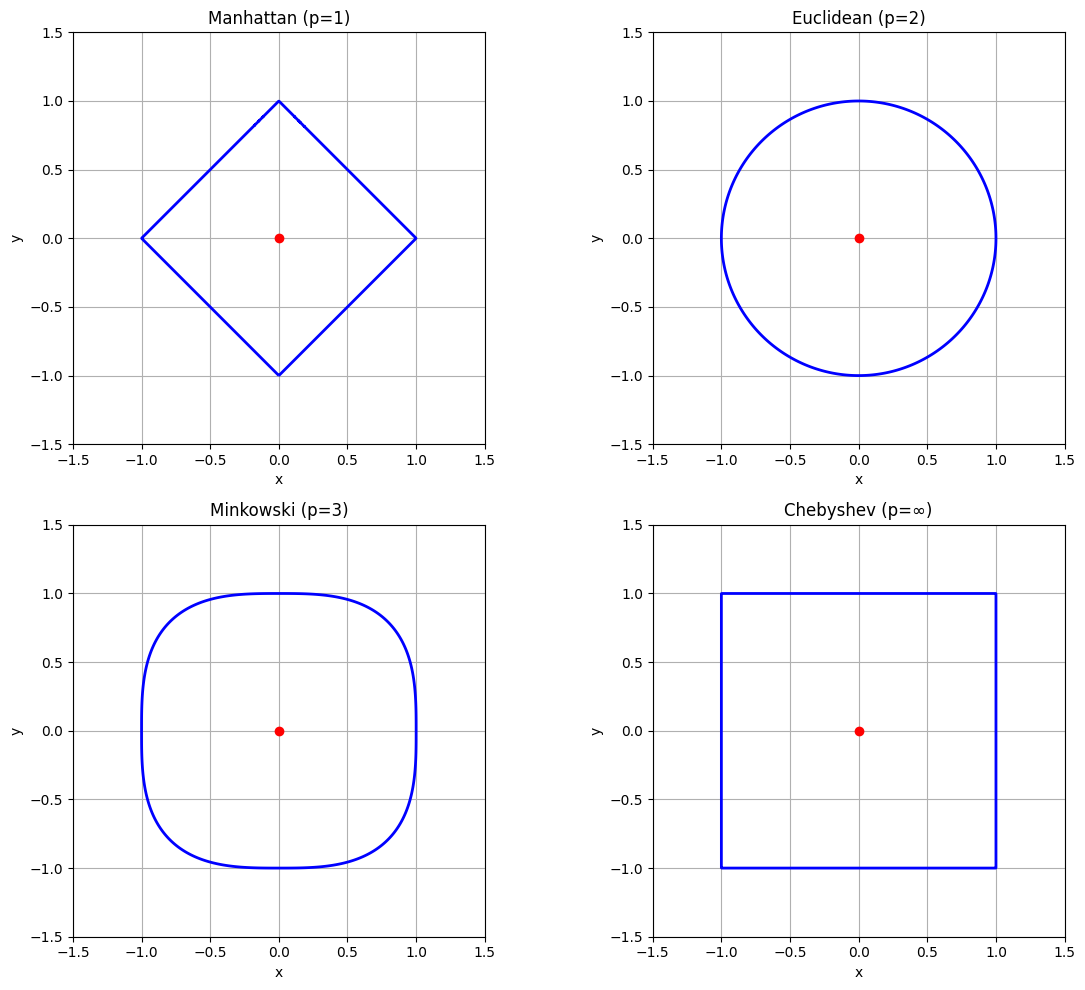

In [64]:
# Visualizing Minkowski distances in 2D
def plot_minkowski_circles():
    """Plot unit circles for different Minkowski distances."""
    # Create a grid of points
    x = np.linspace(-1.5, 1.5, 1000)
    y = np.linspace(-1.5, 1.5, 1000)
    X, Y = np.meshgrid(x, y)
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    
    # Different p values to visualize
    p_values = [1, 2, 3, np.inf]
    titles = ['Manhattan (p=1)', 'Euclidean (p=2)', 'Minkowski (p=3)', 'Chebyshev (p=∞)']
    
    for i, (p, title) in enumerate(zip(p_values, titles)):
        # Calculate distances from origin for all points
        if np.isinf(p):
            Z = np.maximum(np.abs(X), np.abs(Y))
        else:
            Z = np.power(np.power(np.abs(X), p) + np.power(np.abs(Y), p), 1/p)
        
        # Plot the contour at distance = 1
        axs[i].contour(X, Y, Z, levels=[1], colors='blue', linewidths=2)
        
        # Add grid and labels
        axs[i].grid(True)
        axs[i].set_aspect('equal')
        axs[i].set_xlim(-1.5, 1.5)
        axs[i].set_ylim(-1.5, 1.5)
        axs[i].set_title(title)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        
        # Add the origin
        axs[i].plot(0, 0, 'ro')
    
    plt.tight_layout()
    plt.show()

# Plot the unit circles
plot_minkowski_circles()


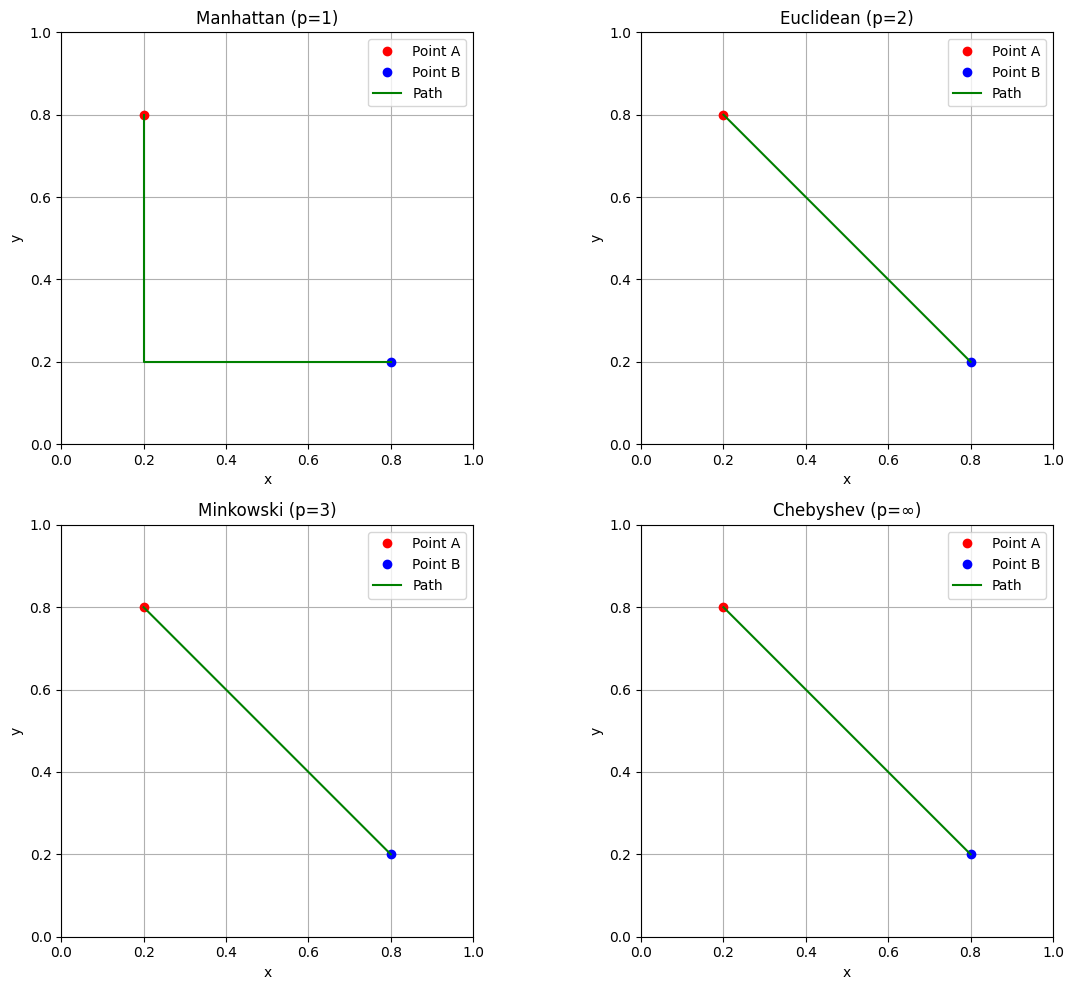

In [65]:
# Visualizing the path between two points for different Minkowski distances
def plot_minkowski_paths():
    """Plot the shortest paths between two points for different Minkowski distances."""
    # Define two points
    point_a = [0.2, 0.8]
    point_b = [0.8, 0.2]
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    
    # Different p values to visualize
    p_values = [1, 2, 3, np.inf]
    titles = ['Manhattan (p=1)', 'Euclidean (p=2)', 'Minkowski (p=3)', 'Chebyshev (p=∞)']
    
    for i, (p, title) in enumerate(zip(p_values, titles)):
        # Plot the points
        axs[i].plot(point_a[0], point_a[1], 'ro', label='Point A')
        axs[i].plot(point_b[0], point_b[1], 'bo', label='Point B')
        
        # Plot the path based on the distance metric
        if p == 1:  # Manhattan
            # Manhattan path follows grid lines
            axs[i].plot([point_a[0], point_a[0], point_b[0]], 
                        [point_a[1], point_b[1], point_b[1]], 
                        'g-', label='Path')
        elif p == np.inf:  # Chebyshev
            # Chebyshev allows diagonal movement at the same cost
            # So we can move diagonally as much as possible
            axs[i].plot([point_a[0], point_b[0]], 
                        [point_a[1], point_b[1]], 
                        'g-', label='Path')
        else:  # Euclidean and other Minkowski
            # Direct path for Euclidean and other Minkowski distances
            axs[i].plot([point_a[0], point_b[0]], 
                        [point_a[1], point_b[1]], 
                        'g-', label='Path')
        
        # Add grid and labels
        axs[i].grid(True)
        axs[i].set_aspect('equal')
        axs[i].set_xlim(0, 1)
        axs[i].set_ylim(0, 1)
        axs[i].set_title(title)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].legend()
    
    plt.tight_layout()
    plt.show()

# Plot the paths
plot_minkowski_paths()


## Applications of Minkowski Distance

The Minkowski distance and its special cases have numerous applications across various domains:

### 1. Machine Learning and Data Mining

- **Classification Algorithms**: k-Nearest Neighbors (k-NN) uses distance metrics to find the closest training examples
- **Clustering**: Algorithms like K-means use distance metrics to group similar data points
- **Anomaly Detection**: Identifying outliers based on their distance from other points

### 2. Recommendation Systems

- **Collaborative Filtering**: Finding similar users or items based on their feature vectors
- **Content-Based Filtering**: Measuring similarity between item features

### 3. Image Processing and Computer Vision

- **Image Retrieval**: Finding similar images in a database
- **Object Recognition**: Comparing feature vectors of objects
- **Face Recognition**: Measuring distances between facial feature vectors

### 4. Bioinformatics

- **Sequence Alignment**: Measuring similarity between genetic sequences
- **Protein Structure Comparison**: Analyzing structural similarities


In [66]:
# Example: Using Minkowski distance for k-NN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare different distance metrics (different p values)
p_values = [1, 2, 3, np.inf]
metrics = ['manhattan', 'euclidean', 'minkowski', 'chebyshev']
p_params = [None, None, 3, None]  # p parameter for minkowski

results = []
for metric, p_param in zip(metrics, p_params):
    # Create and train the k-NN classifier
    if metric == 'minkowski' and p_param is not None:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=p_param)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    knn.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append((metric, accuracy))

# Print the results
print("k-NN Classification Accuracy with Different Distance Metrics:")
for metric, accuracy in results:
    print(f"{metric.capitalize()}: {accuracy:.4f}")


k-NN Classification Accuracy with Different Distance Metrics:
Manhattan: 1.0000
Euclidean: 1.0000
Minkowski: 1.0000
Chebyshev: 0.9778


## Choosing the Right Distance Metric

The choice of distance metric (or the value of p in Minkowski distance) depends on the specific application and the nature of the data:

### Manhattan Distance (p = 1)
- **When to use**: When the feature dimensions have different units or scales
- **Good for**: Grid-like movement, feature spaces where diagonal movement is not natural
- **Examples**: Urban navigation, feature vectors with different units

### Euclidean Distance (p = 2)
- **When to use**: When the feature space is continuous and isotropic (same in all directions)
- **Good for**: Physical distances, natural geometric spaces
- **Examples**: Geographic coordinates, physical measurements, most machine learning applications

### Chebyshev Distance (p = ∞)
- **When to use**: When movement in all dimensions can happen simultaneously
- **Good for**: Scenarios where the maximum difference in any dimension is critical
- **Examples**: Chess king movement, warehouse picking operations, parallel processing time

### Other p values
- **When to use**: When you need a balance between Manhattan and Euclidean properties
- **Good for**: Fine-tuning the distance metric to the specific characteristics of your data
- **Examples**: Specialized machine learning applications, custom similarity measures


In [67]:
# Demonstrating how different distance metrics affect nearest neighbor search
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Create a simple dataset
X = np.array([
    [0, 0],  # Origin
    [1, 0],  # Point to the right
    [0, 1],  # Point above
    [1, 1],  # Point diagonally
    [0.5, 0.5],  # Point halfway
    [2, 2],  # Point far away
])

# Create a query point
query_point = np.array([[0.6, 0.8]])

# Find nearest neighbors using different metrics
metrics = ['manhattan', 'euclidean', 'minkowski', 'chebyshev']
p_values = [None, None, 3, None]

results = []
for metric, p_value in zip(metrics, p_values):
    # Create the nearest neighbors model
    if metric == 'minkowski' and p_value is not None:
        nn = NearestNeighbors(n_neighbors=3, metric=metric, p=p_value)
    else:
        nn = NearestNeighbors(n_neighbors=3, metric=metric)
    
    nn.fit(X)
    
    # Find the 3 nearest neighbors
    distances, indices = nn.kneighbors(query_point)
    
    # Store the results
    for i, (dist, idx) in enumerate(zip(distances[0], indices[0])):
        results.append({
            'Metric': metric.capitalize(),
            'Rank': i+1,
            'Point': tuple(X[idx]),
            'Distance': dist
        })

# Display the results
df = pd.DataFrame(results)
print("Query point:", query_point[0])
print("\nNearest neighbors with different distance metrics:")
for metric in [m.capitalize() for m in metrics]:
    print(f"\n{metric}:")
    metric_results = df[df['Metric'] == metric]
    for _, row in metric_results.iterrows():
        print(f"  Rank {int(row['Rank'])}: Point {row['Point']}, Distance: {row['Distance']:.4f}")


Query point: [0.6 0.8]

Nearest neighbors with different distance metrics:

Manhattan:
  Rank 1: Point (np.float64(0.5), np.float64(0.5)), Distance: 0.4000
  Rank 2: Point (np.float64(1.0), np.float64(1.0)), Distance: 0.6000
  Rank 3: Point (np.float64(0.0), np.float64(1.0)), Distance: 0.8000

Euclidean:
  Rank 1: Point (np.float64(0.5), np.float64(0.5)), Distance: 0.3162
  Rank 2: Point (np.float64(1.0), np.float64(1.0)), Distance: 0.4472
  Rank 3: Point (np.float64(0.0), np.float64(1.0)), Distance: 0.6325

Minkowski:
  Rank 1: Point (np.float64(0.5), np.float64(0.5)), Distance: 0.3037
  Rank 2: Point (np.float64(1.0), np.float64(1.0)), Distance: 0.4160
  Rank 3: Point (np.float64(0.0), np.float64(1.0)), Distance: 0.6073

Chebyshev:
  Rank 1: Point (np.float64(0.5), np.float64(0.5)), Distance: 0.3000
  Rank 2: Point (np.float64(1.0), np.float64(1.0)), Distance: 0.4000
  Rank 3: Point (np.float64(0.0), np.float64(1.0)), Distance: 0.6000


## Advantages and Limitations

### Advantages:

1. **Flexibility**: The parameter p allows for customization to different types of data and applications
2. **Well-established**: Strong mathematical foundation and widely implemented in libraries
3. **Interpretability**: Clear geometric interpretation, especially for common cases (p = 1, 2, ∞)
4. **Efficiency**: Fast to compute, especially for low-dimensional data

### Limitations:

1. **Curse of Dimensionality**: In high-dimensional spaces, distances tend to become more uniform
2. **Sensitivity to Outliers**: Especially for higher values of p
3. **Scale Dependence**: Sensitive to the scale of features (requires normalization)
4. **Feature Independence Assumption**: Assumes features are independent, which may not be true


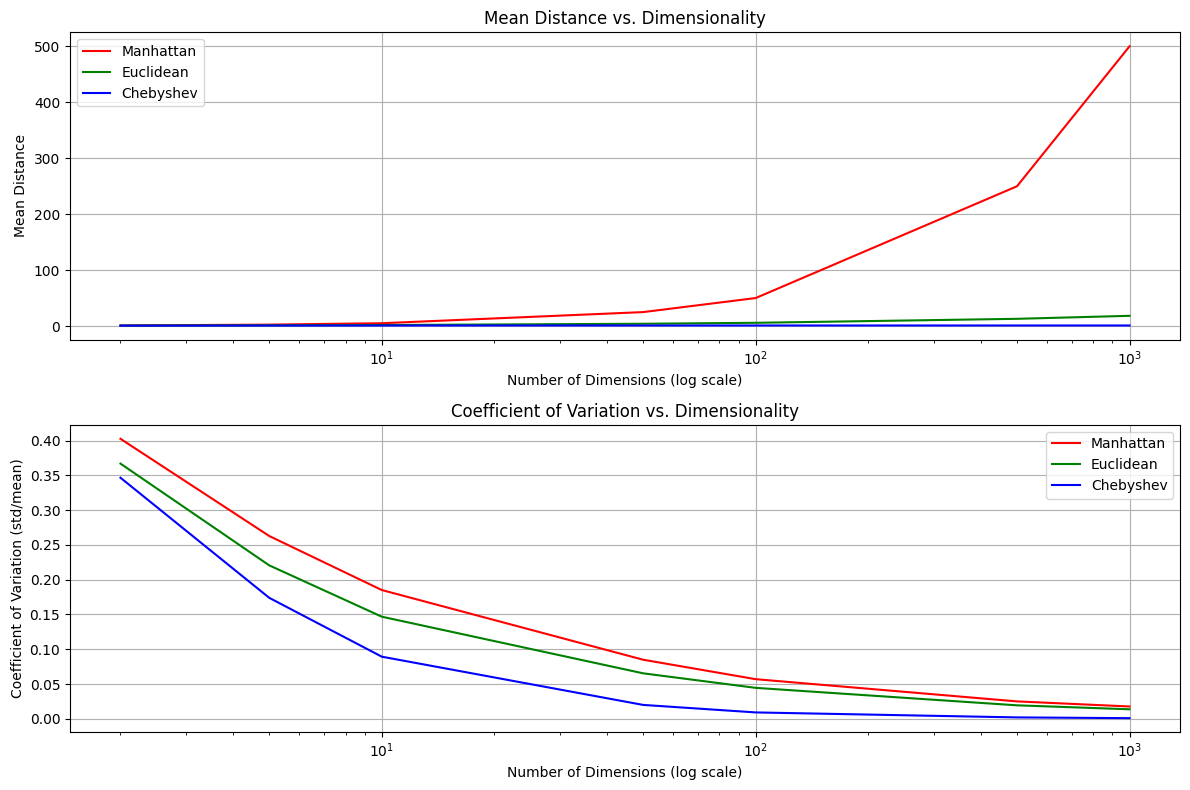

Distance statistics in different dimensions:

Dimensions: 2
Manhattan: mean = 1.0187, cv = 0.4025
Euclidean: mean = 0.7772, cv = 0.3668
Chebyshev: mean = 0.6736, cv = 0.3465

Dimensions: 10
Manhattan: mean = 5.0131, cv = 0.1851
Euclidean: mean = 1.8112, cv = 0.1468
Chebyshev: mean = 0.9096, cv = 0.0894

Dimensions: 100
Manhattan: mean = 50.0122, cv = 0.0571
Euclidean: mean = 5.7676, cv = 0.0446
Chebyshev: mean = 0.9902, cv = 0.0093

Dimensions: 1000
Manhattan: mean = 499.9271, cv = 0.0178
Euclidean: mean = 18.2529, cv = 0.0138
Chebyshev: mean = 0.9990, cv = 0.0011


In [68]:
# Demonstrating the curse of dimensionality
def demonstrate_curse_of_dimensionality():
    """Show how distances behave in high-dimensional spaces."""
    # Number of dimensions to test
    dimensions = [2, 5, 10, 50, 100, 500, 1000]
    
    # Number of random points to generate
    num_points = 1000
    
    # Store results
    results = []
    
    for dim in dimensions:
        # Generate random points in a unit hypercube
        points = np.random.random((num_points, dim))
        
        # Calculate distances from the origin to all points
        manhattan_dists = [manhattan_distance(np.zeros(dim), point) for point in points]
        euclidean_dists = [euclidean_distance(np.zeros(dim), point) for point in points]
        chebyshev_dists = [chebyshev_distance(np.zeros(dim), point) for point in points]
        
        # Calculate statistics
        results.append({
            'Dimensions': dim,
            'Manhattan Mean': np.mean(manhattan_dists),
            'Manhattan Std': np.std(manhattan_dists),
            'Euclidean Mean': np.mean(euclidean_dists),
            'Euclidean Std': np.std(euclidean_dists),
            'Chebyshev Mean': np.mean(chebyshev_dists),
            'Chebyshev Std': np.std(chebyshev_dists),
        })
    
    # Convert to DataFrame for easier display
    df = pd.DataFrame(results)
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(df['Dimensions'], df['Manhattan Mean'], 'r-', label='Manhattan')
    plt.plot(df['Dimensions'], df['Euclidean Mean'], 'g-', label='Euclidean')
    plt.plot(df['Dimensions'], df['Chebyshev Mean'], 'b-', label='Chebyshev')
    plt.xscale('log')
    plt.title('Mean Distance vs. Dimensionality')
    plt.xlabel('Number of Dimensions (log scale)')
    plt.ylabel('Mean Distance')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(df['Dimensions'], df['Manhattan Std'] / df['Manhattan Mean'], 'r-', label='Manhattan')
    plt.plot(df['Dimensions'], df['Euclidean Std'] / df['Euclidean Mean'], 'g-', label='Euclidean')
    plt.plot(df['Dimensions'], df['Chebyshev Std'] / df['Chebyshev Mean'], 'b-', label='Chebyshev')
    plt.xscale('log')
    plt.title('Coefficient of Variation vs. Dimensionality')
    plt.xlabel('Number of Dimensions (log scale)')
    plt.ylabel('Coefficient of Variation (std/mean)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print some key results
    print("Distance statistics in different dimensions:")
    for dim in [2, 10, 100, 1000]:
        row = df[df['Dimensions'] == dim].iloc[0]
        print(f"\nDimensions: {dim}")
        print(f"Manhattan: mean = {row['Manhattan Mean']:.4f}, cv = {row['Manhattan Std']/row['Manhattan Mean']:.4f}")
        print(f"Euclidean: mean = {row['Euclidean Mean']:.4f}, cv = {row['Euclidean Std']/row['Euclidean Mean']:.4f}")
        print(f"Chebyshev: mean = {row['Chebyshev Mean']:.4f}, cv = {row['Chebyshev Std']/row['Chebyshev Mean']:.4f}")

# Run the demonstration
demonstrate_curse_of_dimensionality()


## Comparison with Other Distance Metrics

While Minkowski distance is versatile, there are other distance metrics that may be more appropriate for specific types of data:

### 1. Cosine Similarity/Distance
- Measures the angle between vectors, ignoring magnitude
- Good for text analysis, document similarity, and recommendation systems
- Useful when the direction of vectors is more important than their magnitude

### 2. Mahalanobis Distance
- Takes into account the correlations between variables
- Accounts for the covariance structure of the data
- Useful for multivariate outlier detection and classification with correlated features

### 3. Hamming Distance
- Counts the number of positions at which corresponding symbols differ
- Used for categorical data, binary vectors, and error detection
- Common in information theory and coding

### 4. Jaccard Distance
- Based on the size of the intersection divided by the size of the union of sets
- Used for comparing sample sets, binary data, and document similarity
- Good for sparse binary data


Comparison of different distance metrics:
  Pair  Manhattan  Euclidean  Chebyshev    Cosine  Hamming  Jaccard
0  A-B          3   1.732051          1  0.422650      0.6      0.6
1  A-C          3   1.732051          1       NaN      0.6      1.0
2  A-D         22   9.899495          5  0.225403      0.4      0.4
3  B-C          4   2.000000          1       NaN      0.8      1.0
4  B-D         21   9.433981          5  0.105573      0.2      0.2
5  C-D         25  11.180340          5       NaN      1.0      1.0


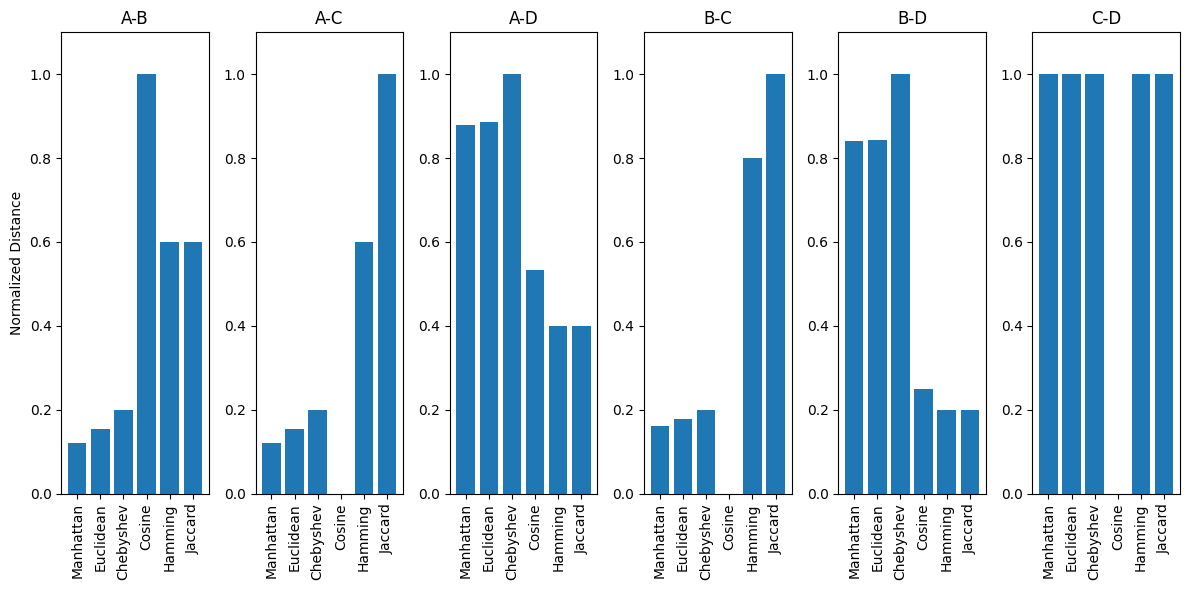

In [69]:
# Comparing different distance metrics on the same data
from scipy.spatial.distance import cosine, hamming, jaccard

# There's a warning in this code, I'm just going to ignore it:
import warnings
warnings.filterwarnings('ignore')

def compare_distance_metrics():
    """Compare different distance metrics on the same data."""
    # Create some example vectors
    vectors = [
        [1, 0, 1, 0, 1],  # Vector A
        [1, 1, 1, 1, 0],  # Vector B
        [0, 0, 0, 0, 0],  # Vector C (zero vector)
        [5, 5, 5, 5, 5],  # Vector D (uniform vector)
    ]
    
    names = ['A', 'B', 'C', 'D']
    
    # Calculate all pairwise distances
    results = []
    
    for i, vec1 in enumerate(vectors):
        for j, vec2 in enumerate(vectors):
            if i < j:  # Only calculate for unique pairs
                # Calculate various distances
                manhattan = manhattan_distance(vec1, vec2)
                euclidean = euclidean_distance(vec1, vec2)
                chebyshev = chebyshev_distance(vec1, vec2)
                cosine_dist = cosine(vec1, vec2)
                hamming_dist = hamming(np.array(vec1) > 0, np.array(vec2) > 0)  # Convert to binary
                jaccard_dist = jaccard(np.array(vec1) > 0, np.array(vec2) > 0)  # Convert to binary
                
                results.append({
                    'Pair': f'{names[i]}-{names[j]}',
                    'Manhattan': manhattan,
                    'Euclidean': euclidean,
                    'Chebyshev': chebyshev,
                    'Cosine': cosine_dist,
                    'Hamming': hamming_dist,
                    'Jaccard': jaccard_dist
                })
    
    # Convert to DataFrame and display
    df = pd.DataFrame(results)
    print("Comparison of different distance metrics:")
    print(df)
    
    # Visualize the differences
    metrics = ['Manhattan', 'Euclidean', 'Chebyshev', 'Cosine', 'Hamming', 'Jaccard']
    
    # Normalize the distances for better comparison
    for metric in metrics:
        max_val = df[metric].max()
        if max_val > 0:
            df[f'{metric} (normalized)'] = df[metric] / max_val
    
    # Plot the normalized distances
    plt.figure(figsize=(12, 6))
    
    for i, pair in enumerate(df['Pair']):
        plt.subplot(1, len(df), i+1)
        values = [df[f'{metric} (normalized)'].iloc[i] for metric in metrics]
        plt.bar(metrics, values)
        plt.title(pair)
        plt.xticks(rotation=90)
        plt.ylim(0, 1.1)
        
        if i == 0:
            plt.ylabel('Normalized Distance')
    
    plt.tight_layout()
    plt.show()

# Run the comparison
compare_distance_metrics()


## Conclusion

The Minkowski distance is a powerful and flexible metric that generalizes several important distance measures used in data science and machine learning. By adjusting the parameter p, you can tailor the distance calculation to the specific characteristics of your data and application requirements.

Key takeaways:
1. Minkowski distance provides a unified framework for measuring distances in multi-dimensional spaces
2. Special cases include Manhattan (p=1), Euclidean (p=2), and Chebyshev (p=∞) distances
3. The choice of distance metric significantly impacts the results of algorithms like k-NN, clustering, and similarity search
4. In high-dimensional spaces, distance metrics behave differently due to the curse of dimensionality
5. While Minkowski distance is versatile, specialized metrics like cosine similarity or Jaccard distance may be more appropriate for specific types of data

When working with distance-based algorithms, it's important to experiment with different distance metrics to find the one that best captures the notion of similarity relevant to your specific problem.